In [1]:
#!pip install --upgrade git+http://github.com/nikitadurasov/masksembles
!wget https://github.com/nikitadurasov/masksembles/raw/main/images/complex_sample_mnist.npy

--2024-10-07 16:59:24--  https://github.com/nikitadurasov/masksembles/raw/main/images/complex_sample_mnist.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nikitadurasov/masksembles/main/images/complex_sample_mnist.npy [following]
--2024-10-07 16:59:24--  https://raw.githubusercontent.com/nikitadurasov/masksembles/main/images/complex_sample_mnist.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6400 (6.2K) [application/octet-stream]
Saving to: ‘complex_sample_mnist.npy.3’

complex_sample_mnis 100%[===================>]   6.25K  --.-KB/s    in 0.001s  

2024-10-07 16:59:24 (8.24 MB/s) - ‘co

# MNIST 

## Keras

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
from masksembles.keras import Masksembles2D, Masksembles1D

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In order to transform regular model into Masksembles model one should add Masksembles2D or Masksembles1D layers in it. General recommendation is to insert these layers right before or after convolutional layers. 

In example below we'll use both Masksembles2D and Masksembles1D layers applied after convolutions. 

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="elu"),
        Masksembles2D(4, 2.0), # adding Masksembles2D
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="elu"),
        Masksembles2D(4, 2.0), # adding Masksembles2D
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Flatten(),
        Masksembles1D(4, 2.), # adding Masksembles1D
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

2024-10-07 17:16:48.643759: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-07 17:16:48.643971: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (GTCWK05): /proc/driver/nvidia/version does not exist
2024-10-07 17:16:48.646387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
masksembles2d (Masksembles2D (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
masksembles2d_1 (Masksembles (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

Training of Masksembles is not different from training of regular model. So we just use standard fit Keras API.

In [6]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2024-10-07 17:17:06.776171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
422/422 [==============================] - 30s 69ms/step - loss: 0.5324 - accuracy: 0.8438 - val_loss: 0.1717 - val_accuracy: 0.9508
Epoch 2/5
422/422 [==============================] - 27s 63ms/step - loss: 0.1684 - accuracy: 0.9498 - val_loss: 0.1165 - val_accuracy: 0.9690
Epoch 3/5
422/422 [==============================] - 27s 64ms/step - loss: 0.1199 - accuracy: 0.9638 - val_loss: 0.0954 - val_accuracy: 0.9733
Epoch 4/5
422/422 [==============================] - 26s 61ms/step - loss: 0.0979 - accuracy: 0.9709 - val_loss: 0.0823 - val_accuracy: 0.9767
Epoch 5/5
422/422 [==============================] - 25s 60ms/step - loss: 0.0843 - accuracy: 0.9740 - val_loss: 0.0754 - val_accuracy: 0.9803


After training we could check that all of Masksembles' submodels would predict similar predictions for training samples.

In [7]:
img = x_train[0] # just random image from training set

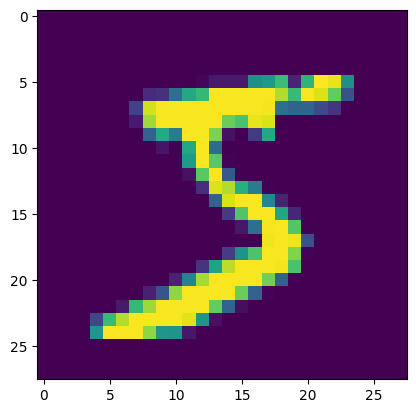

In [8]:
plt.imshow(img[..., 0])
plt.show()

To acquire predictions from different submodels one should transform input (with shape [1, H, W, C]) into batch (with shape [M, H, W, C]) that consists of M copies of original input (H - height of image, W - width of image, C - number of channels).

As we can see Masksembles submodels produce similar predictions for training set samples.

In [9]:
inputs = np.tile(img[None], [4, 1, 1, 1])
predictions = model(inputs)
for i, cls in enumerate(tf.argmax(predictions, axis=1)):
    print(f"PREDICTION OF {i+1} MODEL: {cls} CLASS")

PREDICTION OF 1 MODEL: 5 CLASS
PREDICTION OF 2 MODEL: 5 CLASS
PREDICTION OF 3 MODEL: 5 CLASS
PREDICTION OF 4 MODEL: 5 CLASS


On out-of-distribution samples Masksembles should produce predictions with high variance, let's check it on complex samples from MNIST.

In [10]:
img = np.load("./complex_sample_mnist.npy")

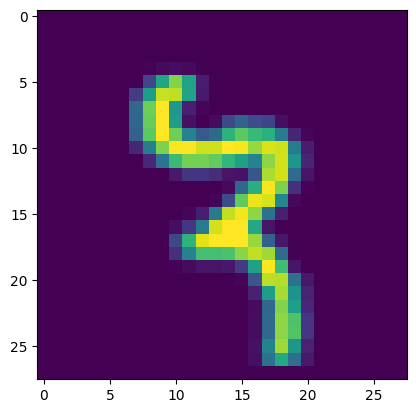

In [11]:
plt.imshow(img[..., 0])

In [12]:
inputs = np.tile(img[None], [4, 1, 1, 1])
predictions = model(inputs)
for i, cls in enumerate(tf.argmax(predictions, axis=1)):
    print(f"PREDICTION OF {i+1} MODEL: {cls} CLASS")

PREDICTION OF 1 MODEL: 7 CLASS
PREDICTION OF 2 MODEL: 7 CLASS
PREDICTION OF 3 MODEL: 7 CLASS
PREDICTION OF 4 MODEL: 7 CLASS
